# Tackling a Data Science problem

In this notebook, we are going to work through the general steps of a Data Science problem.

Data Science problems tend to follow the same process, which you may have seen before:

<div> <img src="flow_3.png" width="1000"> </div>


![](https://miro.medium.com/v2/resize:fit:1400/1*RiEfzta7FkYiRq44jhSb7g.png)

We've had a look at some regression techniques (Simple and Multiple Linear Regression), as well as some Exploratory Data Analysis. While you will be exposed to many more regression models you can use throughout the rest of this sprint, we will use this session to demonstrate how each piece of the puzzle fits together!     


#### Objectives
- **Explain** the Data Science process
- **Practice** using the steps of the data science process together
- **Distinguish** between each step in the process
- **Examine** how the steps of the data science process fit together in order


#### Contents
1. Problem Domain
2. Creating a problem statement
3. Gathering & Loading data
4. Preprocessing/cleaning and EDA
5. Feature Engineering
6. Modelling & Evaluation
7. Findings, conclusions and recommendations

---

## 1. Problem Domain

For this notebook, we are going to be using the California Housing dataset. This dataset contains housing data for various districts in California, gathered from the 1990 US Census. What we want to do is use regression to predict median house values.

![](https://images.pexels.com/photos/1546168/pexels-photo-1546168.jpeg?cs=srgb&dl=pexels-david-mcbee-1546168.jpg&fm=jpg)

**What's the use of predicting housing prices?**

The ability to predict house prices has many applications in real estate and finance. Predicting house prices can help to inform pricing strategies, market analysis and risk assessment. In the world of finance, these predictions can inform mortgage lending, investment portfolios, and can be used as economic indicators about a particular area.

Housing price predictions can help both individuals and institutions to make informed decisions that can have an effect on not only themselves but the wider community and economy.

---

## 2. Creating a Problem Statement

The California housing market is known for its diversity and complexity. Median housing prices can vary significantly between different neighborhoods and regions due to factors like income levels, housing age, and geographical location. Accurate price predictions are essential for both homebuyers and sellers. The Government of California has approached us to develop a predictive model that can estimate median housing prices based on a set of housing and demographic features.

**Problem Statement:**
Our task is to build a regression model that can accurately predict the median housing price (MedHouseVal) in various districts of California. We will utilize the California Housing dataset

---

## 3. Gathering and loading data

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)

# Convert the dataset to a DataFrame
data = pd.DataFrame(california_housing.data)
data['MedHouseVal'] = california_housing.target  # Add the target variable (median house value)

In [4]:
# As always, let's check that our data has loaded in properly
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Attribute Information:
 - **MedInc**:        median income in block
 - **HouseAge**:      median house age in block
 - **AveRooms**:      average number of rooms
 - **AveBedrms**:     average number of bedrooms
 - **Population**:    block population
 - **AveOccup**:      average house occupancy
 - **Latitude**:      house block latitude
 - **Longitude**:     house block longitude
 - **MedHouseVal**: median house value in block [TARGET]

---

## 4. Preprocessing & EDA

Once we've got our data in place, let's start of with some basic exploration of the data, and do some simple cleaning if needed.

First, we have a look at information about our dataframe, using the `.info()` method.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Here we can see that we've got quite a lot of data - 20640 rows! All our features in the dataset are float datatype, so we likely won't have to worry about transforming or visualising any categorical data for now.

In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Next we can get an overview of the descriptive statistics of our dataset. We can see that they are all on quite different ranges. We have some negative values - these being the Longitude values. This makes sense due to the nature of longitude and latitude data, so may be something we need to keep in mind when it comes to any multivariate analysis.

Interestingly, the maximum number of AveBedrms (average bedrooms) is 34! Either this is an anomaly, or there are some very large houses in California. This is something else to keep in mind when moving into EDA - checking for anomalies.

Another important insight we can see from here is that of the MedInc (median income) and MedHouseVal (median house value). The max for both are 15 and 5 respectively - if we have a look at the documentation for this dataset, these values are recorded as tens of thousands. E.g., a value of 5.0 would represent $50,000.

The mean of the MedInc feature is 3.87, whereas the max value is 15.00 - this may indicate some skewness in the data. This pattern is present in a few other features, so we should be looking at the distributions of our data in our EDA to see how severe the skewness is.

Now that we've had a look at an overview of our data, let's check some cleanliness - are there any missing values in our dataset?

In [7]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Luckily not! There are no missing values in our dataset, so we don't have to worry about imputing missing values at this point. 

### Univariate Analysis

However, as we mentioned, there might be some skewness in our data. Let's have a look at those distributions:

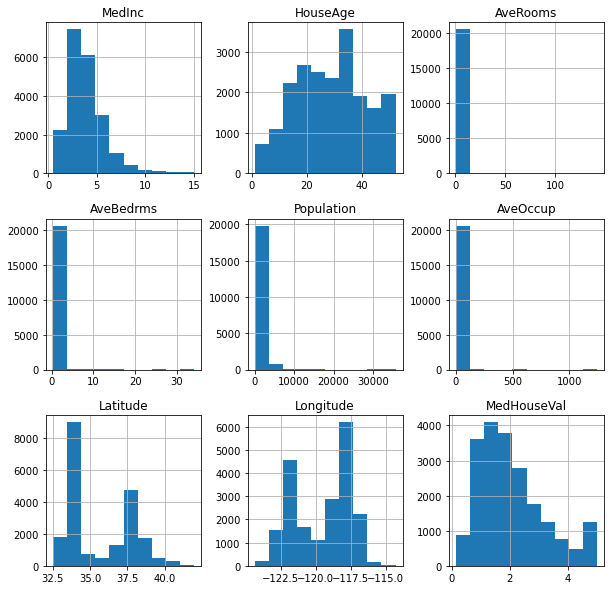

In [8]:
data.hist(figsize = (10,10));

So it looks like there is a LOT of skewness in our data. This is likely going to affect our modelling process, and we may need to remove some outliers or extreme values. 

**Exercise**: Let's have a look at some of these features in more detail. Plot boxplots for AveRooms, AveBedrms, Population and AveOccup. (Try plotting for more of the features if you want!)

In [9]:
# Plot boxplots of AveRooms, AveBedrms, Population and AveOccup (try more of the features if you want!)


Another good way to visualise how much of our data are outliers, is to quantify as a percentage how much data in each column are outliers. As mentioned in a previous session, let's use the 1.5 * IQR threshold as the limit for outliers.

**Exercise**: Below, try to write some code that will give an output of the percentage of outliers per each feature in our dataset.

In [10]:
# Write some code to calculate the percentage of outliers in each column of our dataset


We see the highest amount of outliers is around 7%, in the AveBedrms feature. Now, 7% might not sound like much, but remember we have over 20,000 datapoints. 7% of our total is almost 1500 datapoints. Let's choose to remove all these outliers for now:

In [11]:
# Removing outliers lying outside of the 1.5 * IQR threshold
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data[~outliers]

Now that we've cleaned our data some more (note we now have our data saved as `data_cleaned`, let's move forward with some more visualisations.

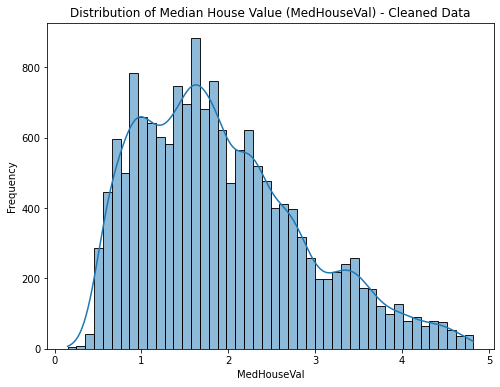

In [12]:
# Distribution of the target variable (MedHouseVal) AFTER outlier removal
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value (MedHouseVal) - Cleaned Data')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.show()

**Exercise**: Try doing some more univariate analysis on the dataset

In [13]:
# Try doing some more univariate analysis on the dataset



### Multivariate analysis

Now we can start looking at how the features interact with some multivariate analysis...

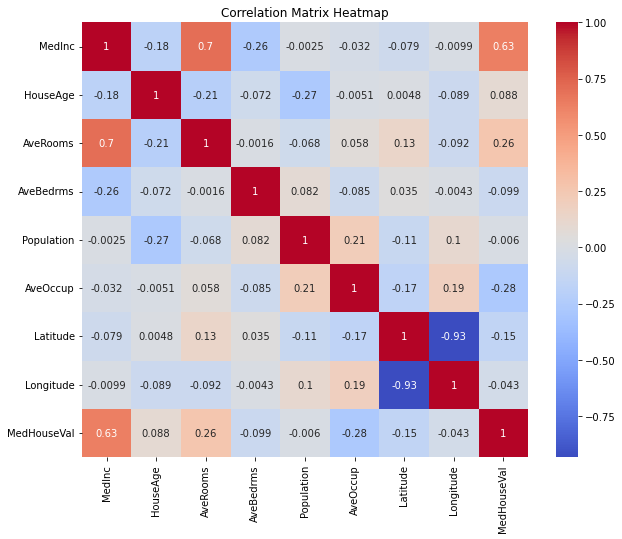

In [14]:
# Correlation matrix heatmap
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

MedInc (median income) has a strong positive correlation with MedHouseVal, indicating that areas with higher median income tend to have higher median house values. AveRooms (average number of rooms) shows a positive correlation with MedHouseVal, suggesting larger houses tend to have higher values. Interestingly, AveOccup shows a weak negative correlation with MedHouseVal - why might this be?

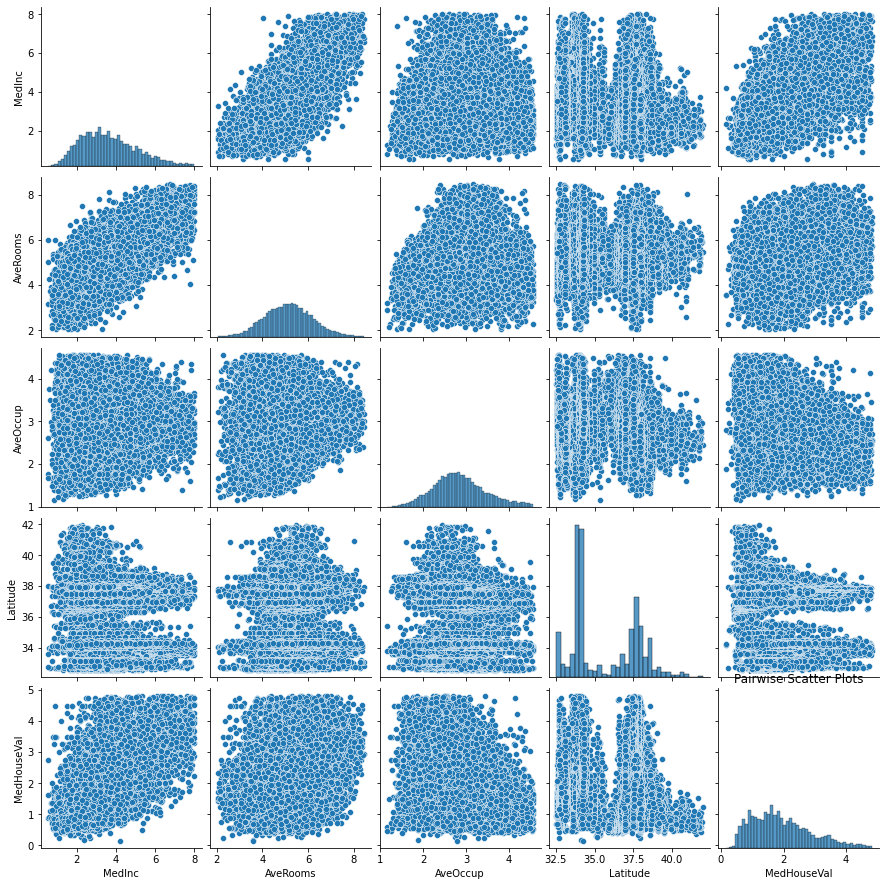

In [15]:
# Pairwise scatter plots for selected features
selected_features = ['MedInc', 'AveRooms',  'AveOccup', 'Latitude', 'MedHouseVal']
sns.pairplot(data_cleaned[selected_features])
plt.title('Pairwise Scatter Plots')
plt.show()

What can we tell from this pairplot? Are there any interesting relationships to explore further? Are there any correlations or relationships that make sense, and perhaps don't need investigating?

**Exercise**: Conduct some more multivariate analysis on the data to explore other relationships between the variables

In [16]:
# Try doing some more multivariate analysis on the dataset



---

## 5. Feature Engineering

Feature engineering is where we would create new features or format existing features in a way we believe will be useful for our predictive modelling. Think back to the Visiualisation sprint, where we created the BMI and Seasons features in our dataset. We may see something in our EDA that can help us identify what other features could be useful. 

In this step as well, you may employ some feature scaling and selection (which you will learn about next week!)

Once we've created those features, we can do some more EDA to see if our intuition was correct and whether that new feature we created does actually demonstrate a relationship with our target variable - this is the back-and-forth nature of doing a project like this.

In [17]:
# Left as an exercise

---

## 6. Modelling & Evaluation

Now comes the most exciting part - creating and evaluating our models! Your modelling will usually be informed by your EDA and feature engineering processes. We had a look at the correlations between our features and the target variable, and found that MedInc had the highest correlation with our target, and quite a strong one at that. We also had quite a few other features that had positive correlations with our target. Due to these relationships that we have found, we are going to create two models:

1. Using only the highest correlated feature with our target variable (simple linear regression)
2. Using the top three highest correlated variables with our target variable (multiple linear regression)

We will train and evaluate both of these models using the RSS and MSE as evaluation metrics.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**1. Using only the highest correlated feature (MedInc)**

In [19]:
# Select only the highest correlated feature - MedInc
X_MedInc = data_cleaned[['MedInc']]
y = data_cleaned['MedHouseVal']

# Split the data into training and testing sets
X_train_MedInc, X_test_MedInc, y_train, y_test = train_test_split(X_MedInc, y, test_size=0.2, random_state=42)

# Fit a linear regression model using only the highest correlated feature
lr_MedInc = LinearRegression()
lr_MedInc.fit(X_train_MedInc, y_train)

# Predict on the test set
y_pred_MedInc = lr_MedInc.predict(X_test_MedInc)

# Calculate RSS and MSE for the model using only the highest correlated feature
rss_MedInc = np.sum((y_test - y_pred_MedInc) ** 2)
mse_MedInc = mean_squared_error(y_test, y_pred_MedInc)

print("Results for Highest Correlated Feature ('MedInc'):")
print("RSS:", rss_MedInc)
print("MSE:", mse_MedInc)

Results for Highest Correlated Feature ('MedInc'):
RSS: 1646.162786563868
MSE: 0.5044936520269285


**2. Using the top three highest correlated features (MedInc, AveRooms, AveOccup)**

In [20]:
# Now, let's select a set of features
top_three = ['MedInc', 'AveRooms', 'AveOccup']
X_top_three = data_cleaned[top_three]

# Split the data into training and testing sets
X_train_top_three, X_test_top_three, y_train, y_test = train_test_split(X_top_three, y, test_size=0.2, random_state=42)

# Fit a linear regression model using the selected features
lr_top_three = LinearRegression()
lr_top_three.fit(X_train_top_three, y_train)

# Predict on the test set
y_pred_top_three = lr_top_three.predict(X_test_top_three)

# Calculate RSS and MSE for the model using the selected features
rss_top_three = np.sum((y_test - y_pred_top_three) ** 2)
mse_top_three = mean_squared_error(y_test, y_pred_top_three)

print("\nResults for top three correlated features:")
print("RSS:", rss_top_three)
print("MSE:", mse_top_three)


Results for top three correlated features:
RSS: 1342.1027221189977
MSE: 0.4113094459451418


From our results, we can see that our model on the top three features actually performed better than the model that only used one feature - why might this be?

![](https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/6230e9ee021b250dd3710f8e_61ca4fbcc80819e696ba0ee9_Feature-Engineering-Machine-Learning-Diagram.png)

---

## 7. Findings, conclusions, recommendations...

1. How did cleaning up our data affect our EDA? Do you think it was useful? How do you think it impacted the model?
2. Can you think of any reason *not* to remove outliers from the data?
3. How would you take this project further? What additional steps would you add?
4. Have we solved the problem? If not, what do we still need to do?
5. How would we communicate these findings to potential clients?